Desarrollo del análisis

In [5]:
#Cargamos los datos en nuestra variable data
url <- "/content/kalimati_tarkari_dataset.csv"
data <- read.csv(url)

In [6]:
#Visualizamos las primeras lineas
head(data)
#Comprobamos la estrucutra de los datos
str(data)
#Estadísticas descriptivas
summary(data)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,Tomato Big(Nepali),2013-06-16,Kg,35,40,37.5
2,1,Tomato Small(Local),2013-06-16,Kg,26,32,29.0
3,2,Potato Red,2013-06-16,Kg,20,21,20.5
4,3,Potato White,2013-06-16,Kg,15,16,15.5
5,4,Onion Dry (Indian),2013-06-16,Kg,28,30,29.0
6,5,Carrot(Local),2013-06-16,Kg,30,35,32.5


'data.frame':	197161 obs. of  7 variables:
 $ SN       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Commodity: chr  "Tomato Big(Nepali)" "Tomato Small(Local)" "Potato Red" "Potato White" ...
 $ Date     : chr  "2013-06-16" "2013-06-16" "2013-06-16" "2013-06-16" ...
 $ Unit     : chr  "Kg" "Kg" "Kg" "Kg" ...
 $ Minimum  : num  35 26 20 15 28 30 6 30 35 25 ...
 $ Maximum  : num  40 32 21 16 30 35 10 35 40 30 ...
 $ Average  : num  37.5 29 20.5 15.5 29 32.5 8 32.5 37.5 27.5 ...


       SN          Commodity             Date               Unit          
 Min.   :     0   Length:197161      Length:197161      Length:197161     
 1st Qu.: 49290   Class :character   Class :character   Class :character  
 Median : 98580   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 98580                                                           
 3rd Qu.:147870                                                           
 Max.   :197160                                                           
    Minimum           Maximum           Average       
 Min.   :   1.00   Min.   :   6.00   Min.   :   5.00  
 1st Qu.:  40.00   1st Qu.:  45.00   1st Qu.:  42.50  
 Median :  60.00   Median :  70.00   Median :  65.00  
 Mean   :  85.42   Mean   :  94.16   Mean   :  89.79  
 3rd Qu.: 100.00   3rd Qu.: 110.00   3rd Qu.: 105.00  
 Max.   :1800.00   Max.   :2000.00   Max.   :1900.00  

In [7]:
#Creamos una serie temporal
data$Date <- as.Date(data$Date)

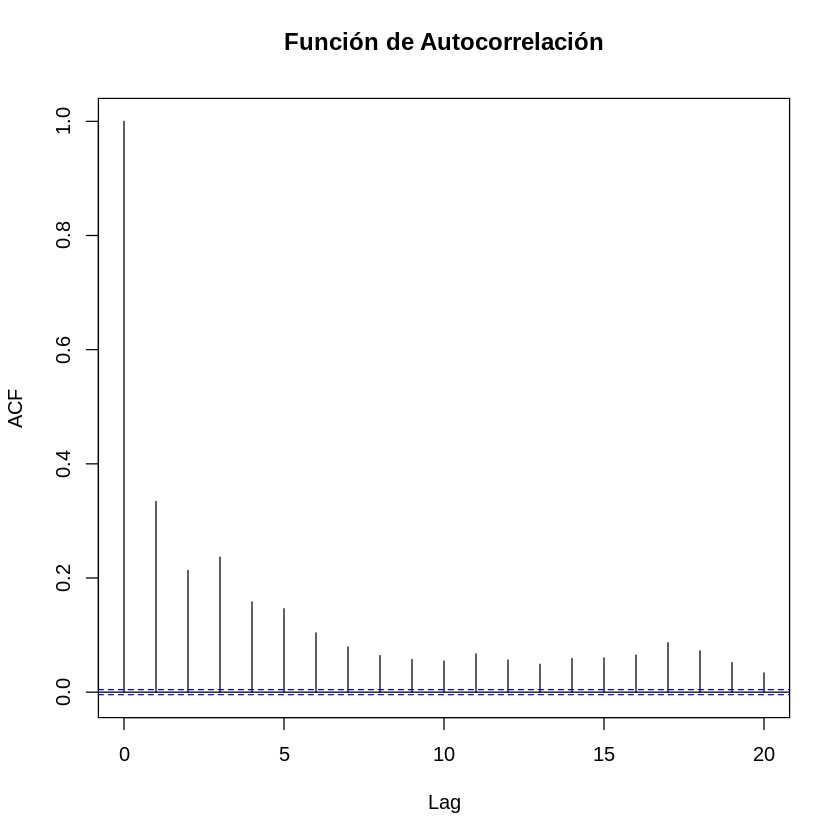

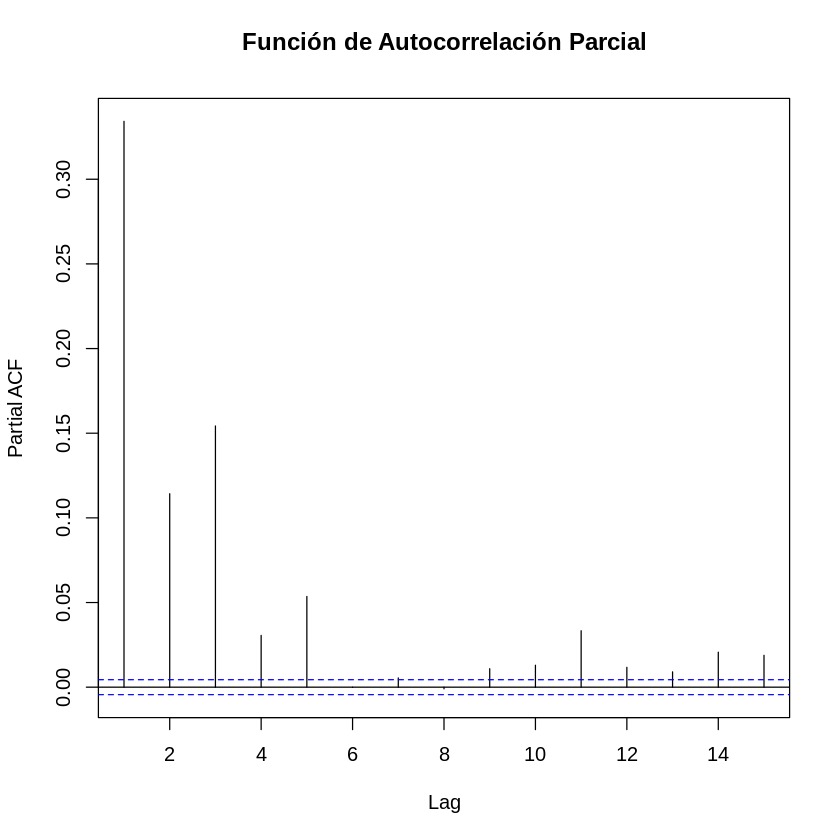

In [8]:
#Función de autocorrelación
acf(data$Average, lag.max = 20, main = "Función de Autocorrelación")

#Función de autocorrelación parcial
pacf(data$Average, lag.max = 15, main = "Función de Autocorrelación Parcial")

In [9]:
#Ordenamos los datos por fecha
data <- data[order(data$Date), ]

#Tamaño del conjunto de entrenamiento
train_size <- 0.5

#Aseguramos que la longitud de los datos de entrenamiento sea una fracción exacta de la longitud total
n_train <- nrow(data) / 2
n_test <- nrow(data) - n_train

train_data <- data[1:n_train, ]
test_data <- data[(n_train + 1):(n_train + n_test), ]


In [10]:
length(train_data$Average)
length(test_data$Average)

[1] 98580

[1] 98580

In [16]:
# Instalamos el paquete forecast
if (!require(forecast)) {
  install.packages("forecast")
  library(forecast)
}

Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [18]:
#Definimos los valores de p, d y q
p <- 2
d <- 1
q <- 3

#Modelo ARIMA
model <- arima(train_data$Average, order = c(p, d, q))
summary(model)


Call:
arima(x = train_data$Average, order = c(p, d, q))

Coefficients:
          ar1     ar2      ma1      ma2     ma3
      -0.0205  0.5804  -0.6987  -0.7578  0.4569
s.e.   0.0165  0.0106   0.0160   0.0183  0.0073

sigma^2 estimated as 4777:  log likelihood = -557439.8,  aic = 1114892

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.1969269 69.11552 43.42706 -53.49612 75.15646 0.8499655
                    ACF1
Training set -0.00749343


	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)
Q* = 807.67, df = 5, p-value < 2.2e-16

Model df: 5.   Total lags used: 10



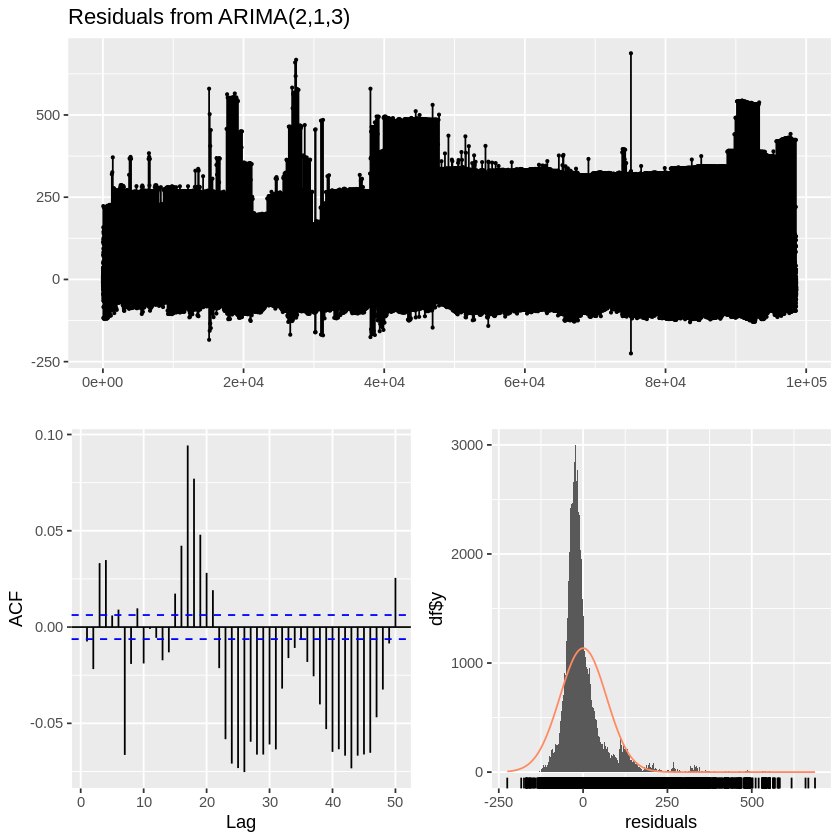

In [17]:
checkresiduals(model)

In [19]:
#Model SARIMA
sarima_model <- auto.arima(train_data$Average, seasonal = TRUE)
summary(sarima_model)

Series: train_data$Average 
ARIMA(2,1,2) with drift 

Coefficients:
          ar1     ar2      ma1      ma2   drift
      -0.6556  0.1634  -0.0193  -0.8103  0.0010
s.e.   0.0100  0.0062   0.0092   0.0095  0.0257

sigma^2 = 4997:  log likelihood = -559657.9
AIC=1119328   AICc=1119328   BIC=1119385

Training set error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.007818466 70.68986 44.44058 -53.96826 77.73115 0.8698024
                     ACF1
Training set -0.008551945


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2) with drift
Q* = 1901.4, df = 6, p-value < 2.2e-16

Model df: 4.   Total lags used: 10



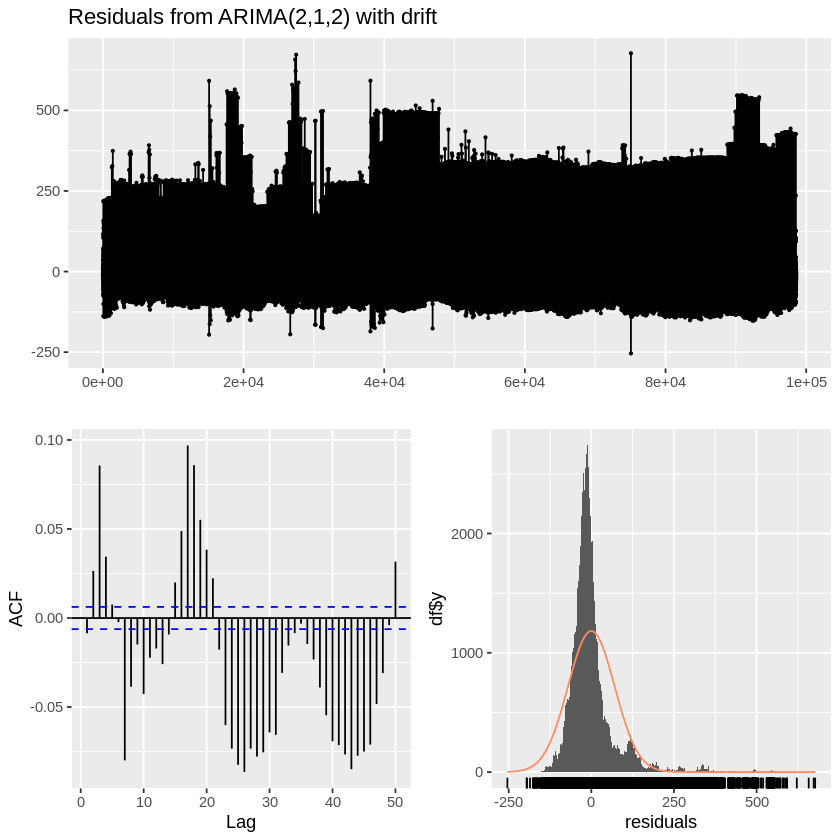

In [20]:
checkresiduals(sarima_model)

In [26]:
forecast <- forecast(sarima_model, h = length(test_data$Average))

In [27]:
# Comprobar las clases de los objetos
class(test_data$Average)
class(forecast)

[1] "numeric"

[1] "forecast"

In [ ]:
length(test_data$Average)
length(forecast)

[1] 98580

[1] 10

In [28]:
#Extraemos los valores como un vector
forecast_values_vector <- as.vector(forecast$mean)

In [29]:
#Calculamos el error absoluto medio (MAE)
mae <- mean(abs(forecast_values_vector - test_data$Average))
#Calculamos el error cuadrático medio (RMSE)
rmse <- sqrt(mean((forecast_values_vector - test_data$Average)^2))

In [30]:
mae
rmse

[1] 60.10245

[1] 86.17524

In [31]:
#Combinamos los datos de prueba y valores pronosticados en un dataframe
aligned_data <- merge(test_data, data.frame(Date = test_data$Date, Forecast = forecast_values_vector), by = "Date")

In [32]:
#Prueba de hipótesis (t-test)
t_test <- t.test(aligned_data$Average, aligned_data$Forecast)
print(t_test)


	Welch Two Sample t-test

data:  aligned_data$Average and aligned_data$Forecast
t = 49.696, df = 9142282, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.597036 1.728180
sample estimates:
mean of x mean of y 
 99.98007  98.31746 



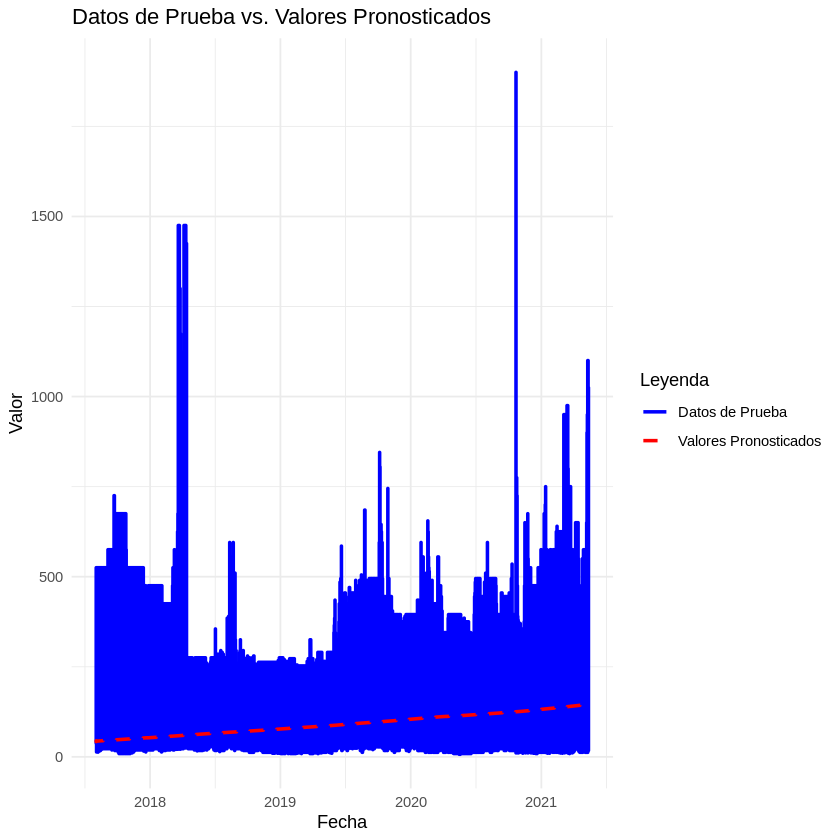

In [33]:
library(ggplot2)

#Creamos un dataframe que combine los datos de prueba y los valores pronosticados
combined_data <- data.frame(
  Date = test_data$Date,
  Actual = test_data$Average,
  Forecast = forecast_values_vector
)

#Cramos el gráfico de líneas
ggplot(combined_data, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual"), linewidth = 1) +
  geom_line(aes(y = Forecast, color = "Forecast"), linewidth = 1, linetype = "dashed") +
  labs(title = "Datos de Prueba vs. Valores Pronosticados",
       x = "Fecha",
       y = "Valor",
       color = "Leyenda") +
  scale_color_manual(values = c("Actual" = "blue", "Forecast" = "red"),
                     labels = c("Datos de Prueba", "Valores Pronosticados")) +
  theme_minimal()


Descomposición de la serie temporal

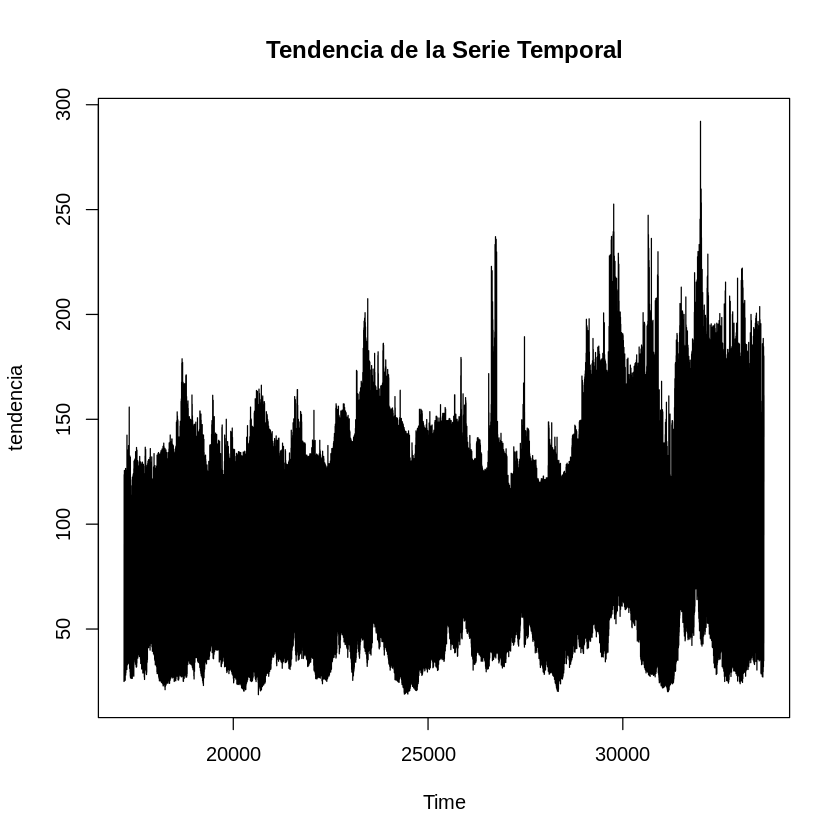

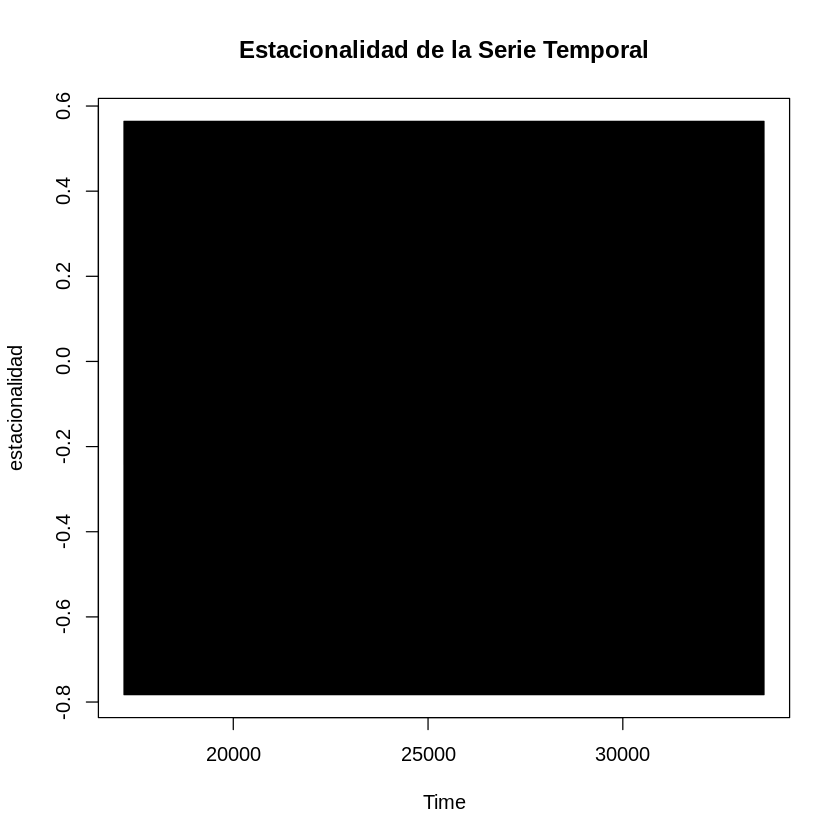

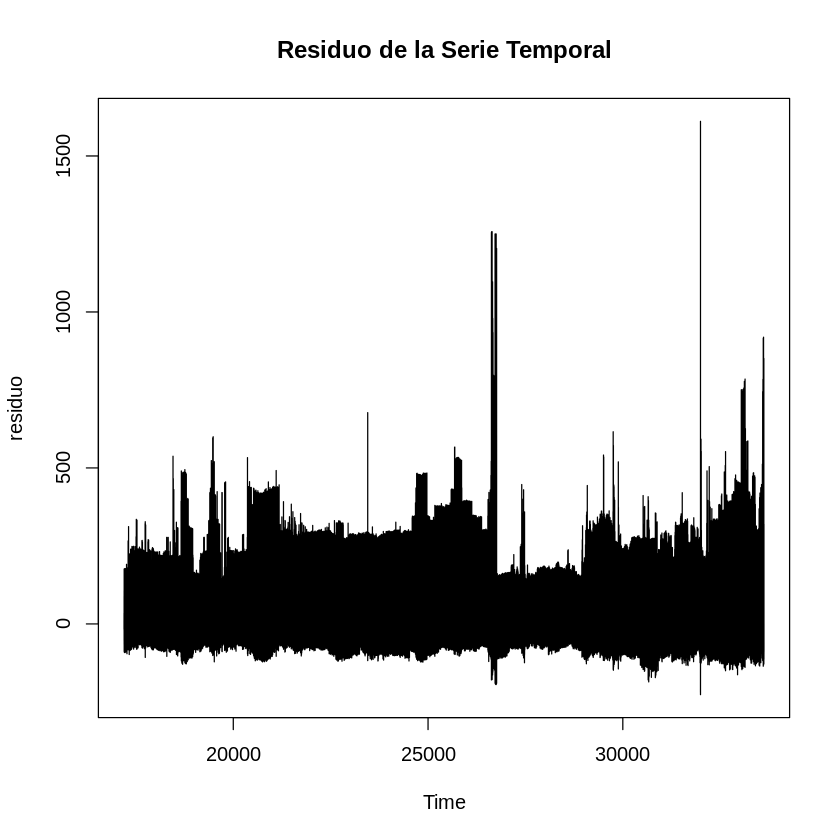

In [ ]:
# Cargar los datos
data <- read.csv("/content/kalimati_tarkari_dataset.csv")

# Convertir la columna 'Date' a tipo Date
data$Date <- as.Date(data$Date)

# Crear una serie temporal
ts_data <- ts(data$Average, start = c(data$Date), frequency = 12)

# Realizar la descomposición
decomposition <- decompose(ts_data)

# Acceder a la tendencia
tendencia <- decomposition$trend
plot(tendencia, main = "Tendencia de la Serie Temporal")

# Acceder a la estacionalidad
estacionalidad <- decomposition$seasonal
plot(estacionalidad, main = "Estacionalidad de la Serie Temporal")

# Acceder al residuo
residuo <- decomposition$random
plot(residuo, main = "Residuo de la Serie Temporal")


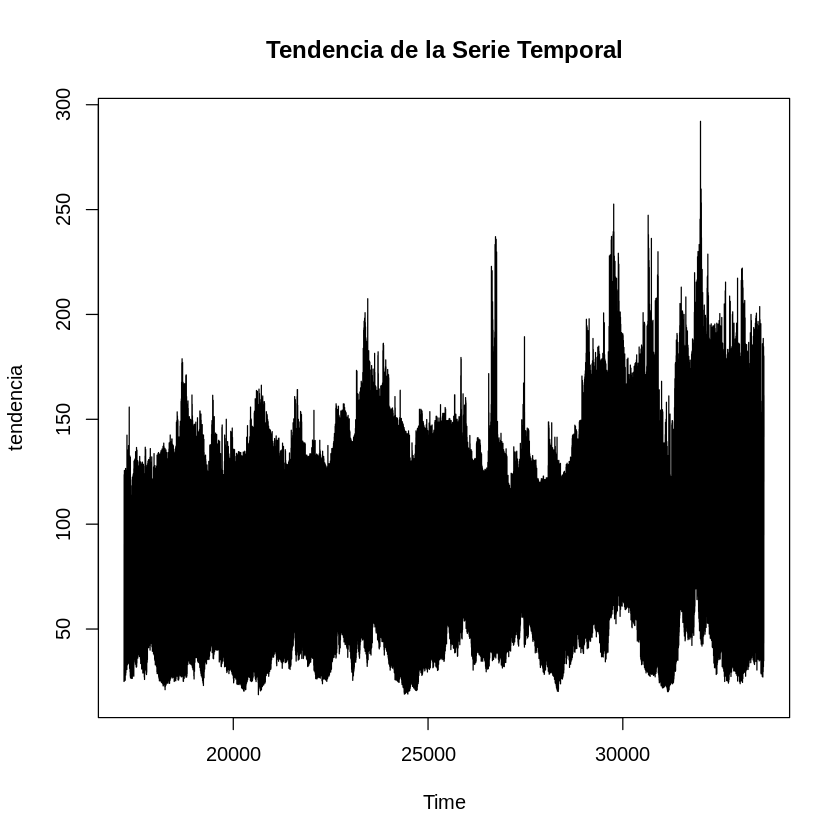

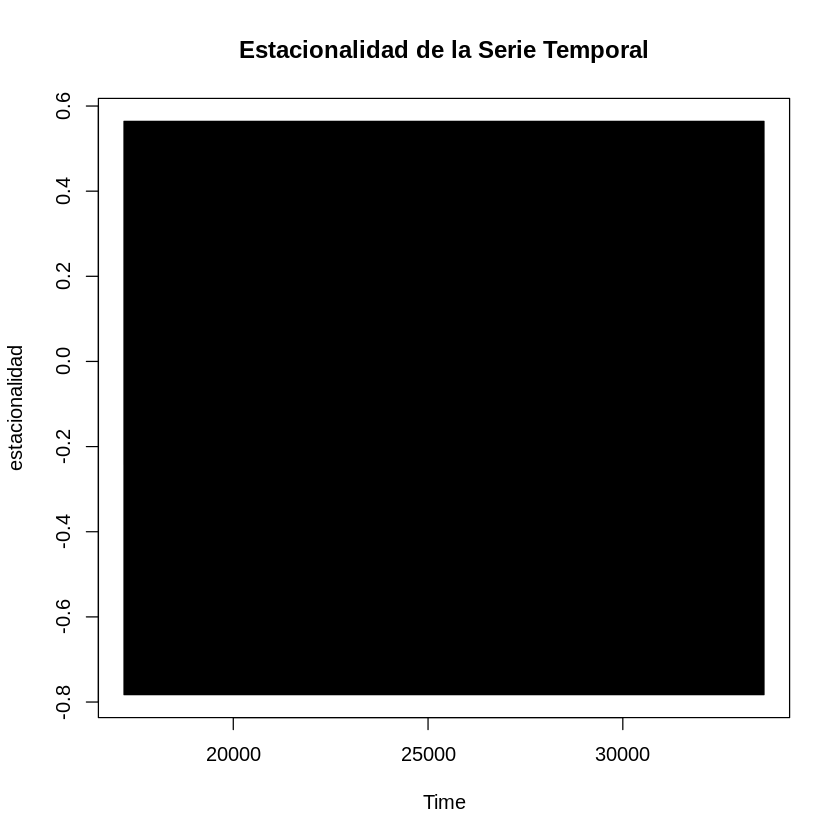

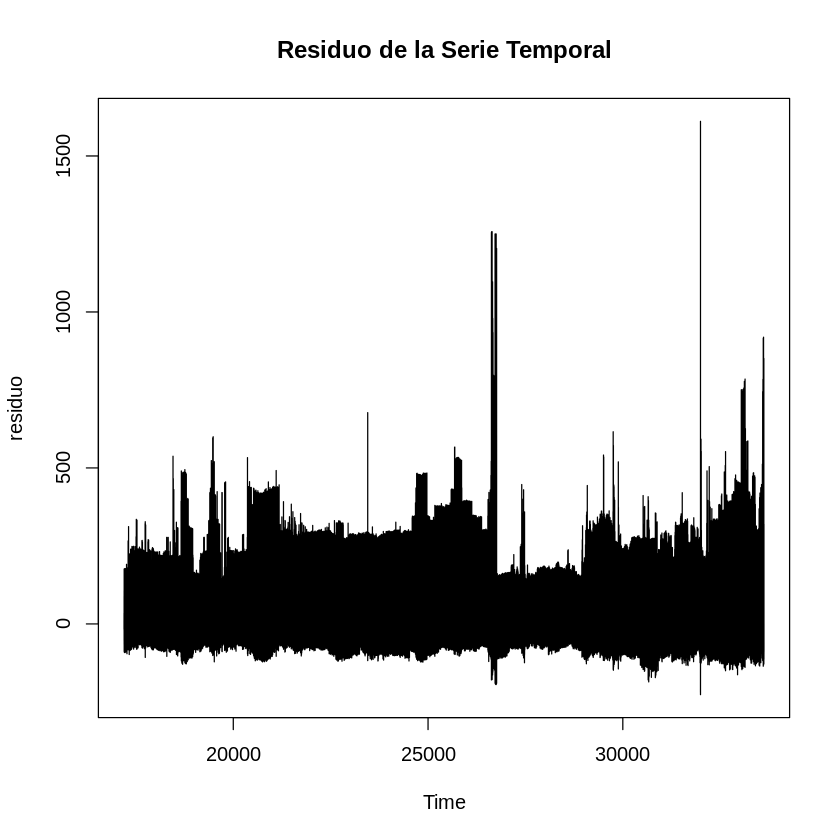

In [ ]:
# Acceder a la tendencia
tendencia <- decomposition$trend
plot(tendencia, main = "Tendencia de la Serie Temporal")

# Acceder a la estacionalidad
estacionalidad <- decomposition$seasonal
plot(estacionalidad, main = "Estacionalidad de la Serie Temporal")

# Acceder al residuo
residuo <- decomposition$random
plot(residuo, main = "Residuo de la Serie Temporal")